In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col

spark = SparkSession.builder.appName('733').getOrCreate()
sc = spark.sparkContext

In [2]:
annual_df = spark.read.csv('../annual_compustat.csv', header=True) #.limit(20000)

In [3]:
misstatements = spark.read.csv('../misstatements.csv', header=True)

In [4]:
new_df = annual_df.join(misstatements, annual_df.tic == misstatements.ticker)

In [5]:
new_df.select('tic').distinct().count()

1095

In [6]:
new_df.show()

+------+--------+-----+------+------+------+-------+----+---------+--------------------+-------+-------+-------+----+------+------+----+------+-----+------+------+-------+-----+---+-----+----+----+-----+----+---+-----+----+---+--------+-----+-----+------+----+----+------+-----+-------+------+------+-----+-------+-------+-----+--------+-------+--------+---------+------+-----+------+-----+----+------+------+----+------+----+----+----+----+------+---------+---------+-------+---------+----+----+-------+------+------+------+----+----+-----+----+-------+----+-----+------+----+-----+------+----+----+----+-----+-------+-----+------+----+-----+----+-----+------+-------+----+----+----+------+-----+-----+----+-----+----+-------+-----+----+-----+-----+-----+------+------+------+----+----+-----+----+-------+-------+-------+----+-----+----+-----+----+----+----+----+------+------+-------+----+----+-------+------+-------+-----+-------+-----+-------+-------+------+------+------+------+----+----+----+--

In [10]:
rea_df = annual_df.select('rea')

In [31]:
rea_df = rea_df.filter(rea_df.rea.isNotNull())

In [16]:
type(rea_df.first()[0])

str

In [35]:
df = rea_df.select(col('rea'), rea_df.rea.cast('float').alias('float_rea'))

In [36]:
rea_df = rea_df.where(rea_df.rea != 0)

In [37]:
rea_df.show()

+---------+
|      rea|
+---------+
|   2.7720|
|  -1.6560|
| -35.1880|
|  -1.4840|
|  17.6000|
|-158.8000|
|  69.8020|
| 115.7440|
|  -1.2810|
|  -1.9000|
|  -8.0390|
|   1.6850|
|  22.0970|
|  -2.5780|
|  -3.4550|
|  -3.1030|
|  -4.7740|
|   7.0120|
| -11.4510|
| -16.9130|
+---------+
only showing top 20 rows



In [42]:
df.show()

+---------+---------+
|      rea|float_rea|
+---------+---------+
|   2.7720|    2.772|
|  -1.6560|   -1.656|
| -35.1880|  -35.188|
|  -1.4840|   -1.484|
|  17.6000|     17.6|
|-158.8000|   -158.8|
|  69.8020|   69.802|
| 115.7440|  115.744|
|  -1.2810|   -1.281|
|  -1.9000|     -1.9|
|  -8.0390|   -8.039|
|   1.6850|    1.685|
|  22.0970|   22.097|
|  -2.5780|   -2.578|
|  -3.4550|   -3.455|
|  -3.1030|   -3.103|
|  -4.7740|   -4.774|
|   7.0120|    7.012|
| -11.4510|  -11.451|
| -16.9130|  -16.913|
+---------+---------+
only showing top 20 rows



In [43]:
rea_vector = df.select('float_rea').collect()[1:100]

In [44]:
len(rea_vector)

99

In [50]:
rea_vector = [x[0] for x in rea_vector]

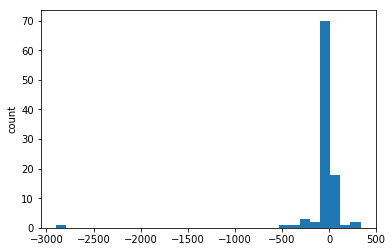

In [51]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
# x = np.random.normal(size = 1000)
plt.hist(rea_vector, bins=30)
plt.ylabel('count');

In [23]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# mu, sigma = 100, 15
# x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(rea_vector, 50, facecolor='green', alpha=0.75)

# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

TypeError: cannot perform reduce with flexible type